# PIMA 인디언 당뇨병 예측

- 50년대 까지 PIMA인디언은 당뇨가 없었음
- 20세기 말, 50%가 당뇨에 걸림
- 50년만에 50%의 인구가 당뇨에 걸림. 왜??

In [1]:
import pandas as pd

pima_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

pima = pd.read_csv(pima_url)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


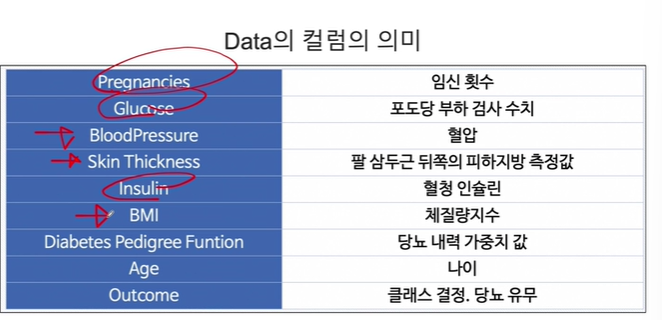

In [2]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
pima=pima.astype('float')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


상관관계 확인

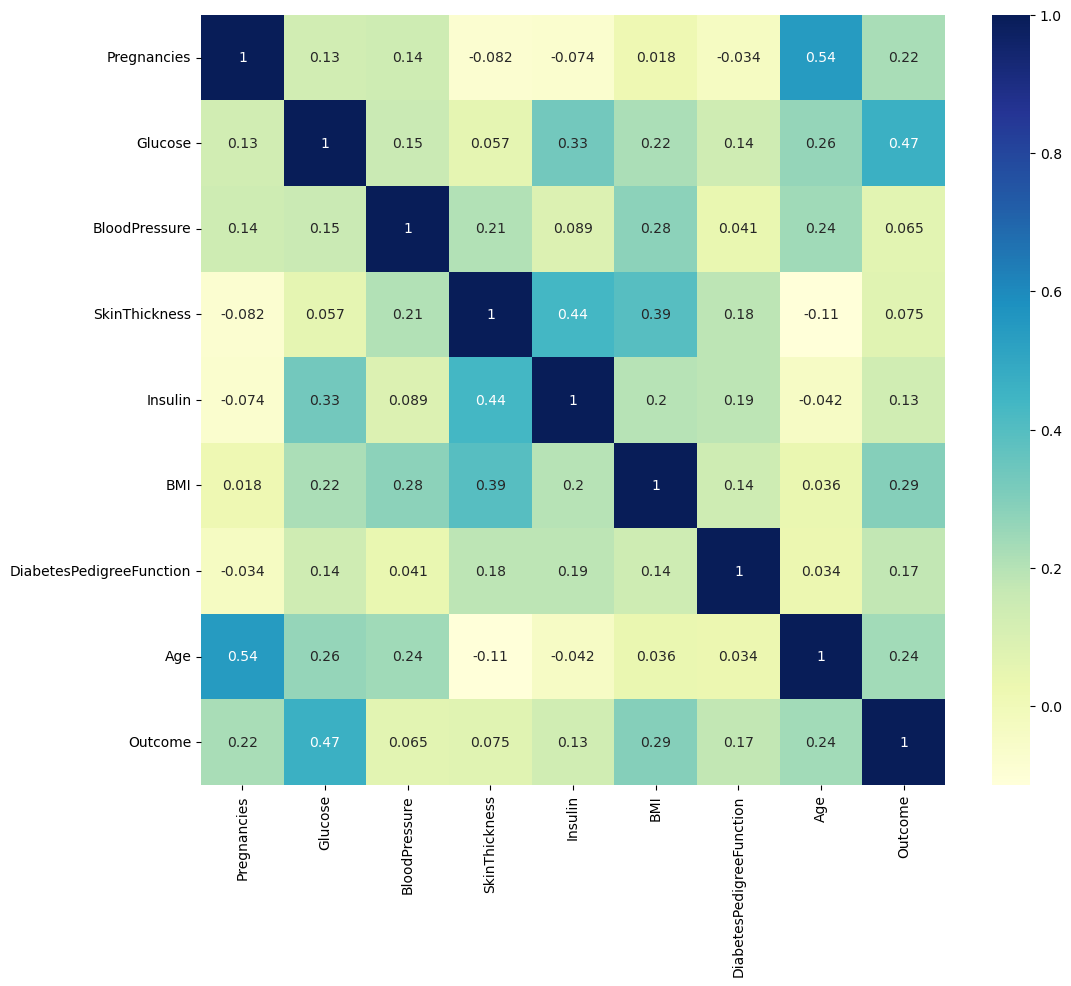

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(pima.corr(), cmap='YlGnBu',annot=True)
plt.show()

결측치 확인
- 이 데이터에 0이라는 숫자가 있다. 혈압 컬럼에 0이 있다는 것은 이상함

In [8]:
(pima==0).astype('int').sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

의학적 지식과 PIMA 인디언에 대한 정보가 없으므로 일단 평균값으로 대체

In [9]:
zero_features = ['Glucose','BloodPressure','BMI','SkinThickness']

pima[zero_features] = pima[zero_features].replace(0, pima[zero_features].mean())

In [10]:
(pima==0).astype('int').sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X = pima.drop('Outcome',axis=1)
y = pima.Outcome

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=13)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimator = [
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear',random_state=13))
]

pipe_lr = Pipeline(estimator)
pipe_lr.fit(X_train,y_train)

pred = pipe_lr.predict(X_test)

In [13]:
from sklearn.metrics import (accuracy_score,recall_score,precision_score,f1_score,roc_auc_score)

In [14]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('F1:',f1_score(y_test,pred))
print('AUC:',roc_auc_score(y_test,pred))

Accuracy: 0.7727272727272727
Recall: 0.6111111111111112
Precision: 0.7021276595744681
F1: 0.6534653465346535
AUC: 0.7355555555555556


몇몇 수치를 확인했지만 아직 상대적 평가를 할수는 없다.

다변수 방정식의 각 계수 값을 확인할 수 있다.

In [21]:
coef = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [22]:
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

중요한 feature에 대해 그리기

In [23]:
features = pd.DataFrame(
    {'Features' : labels, 'importances' : coef}
)

features.sort_values(by = ['importances'],ascending=True,inplace=True)

In [24]:
features

,Features,importances
4,Insulin,-0.162865
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
7,Age,0.171960
0,Pregnancies,0.354266
6,DiabetesPedigreeFunction,0.366694
5,BMI,0.620405
1,Glucose,1.201424


In [25]:
features['positive'] = features['importances'] > 0

In [26]:
features

,Features,importances,positive
4,Insulin,-0.162865,False
2,BloodPressure,-0.158401,False
3,SkinThickness,0.033947,True
7,Age,0.171960,True
0,Pregnancies,0.354266,True
6,DiabetesPedigreeFunction,0.366694,True
5,BMI,0.620405,True
1,Glucose,1.201424,True


In [27]:
features.set_index('Features',inplace=True)

In [28]:
features

,importances,positive
Features,,
Insulin,-0.162865,False
BloodPressure,-0.158401,False
SkinThickness,0.033947,True
Age,0.171960,True
Pregnancies,0.354266,True
DiabetesPedigreeFunction,0.366694,True
BMI,0.620405,True
Glucose,1.201424,True


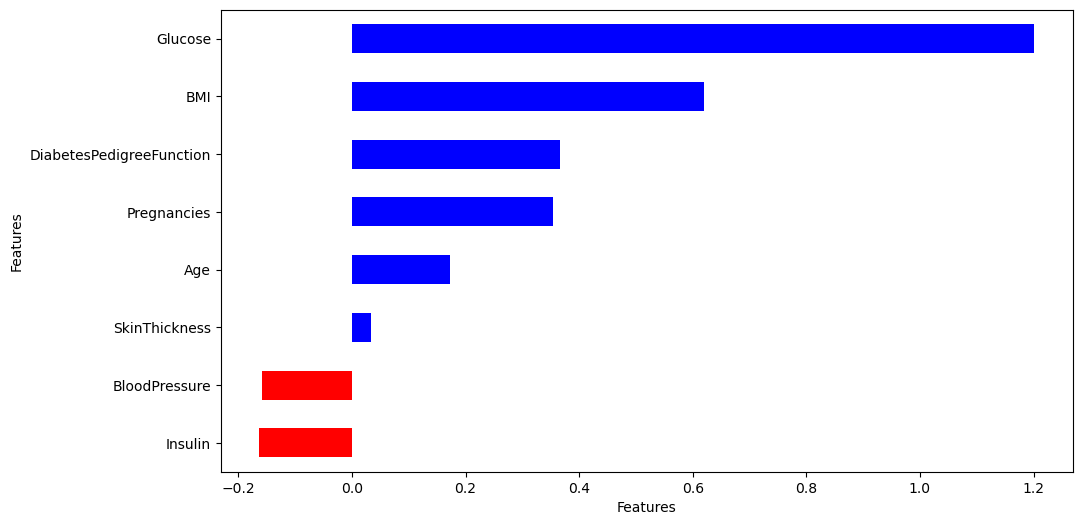

In [29]:
features['importances'].plot(kind='barh',figsize=(11,6),color=features['positive'].map({True:'blue',False:'red'}))
plt.xlabel('Features')
plt.show()

- 포도당, BMI 등은 당뇨에 영향을 미치는 정도가 높다
- 혈압은 예측에 부정적 영향을 준다
- 연령이 BMI보다 출력 변수와 더 관련되어 있었지만(상관계수), 모델은 BMI와 Glucose에 더 의존함

***중요한 포인트***
- 눈에 띄진 않았지만 논리적으로 이상한 데이터 어떻게 처리할 것인지 고민해보는 과정
- pipeline 연습
- 여러 모델을 비교하지 않으면 모델의 평가 지표가 좋은지 나쁜지 알 수 없다는 점